In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Загрузка датасета
df = pd.read_csv('S02-hw-dataset.csv')

In [3]:
# Первичный осмотр данных
print(df.head())
print(df.info())
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [12]:
# Проверка пропусков
missing_data = df.isna().mean()
print(missing_data)

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [10]:
# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 1


In [11]:
# Проверка подозрительных значений
suspicious_data = df[(df['age'] < 0) | (df['age'] > 100)]
print(suspicious_data)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


##### **Описание проблем в данных:**
1. Пропущенные значения (NaN):
В данных есть пропущенные значения, например, в строке user_id = 5 отсутсвует значение для столбца age.
2. Нет диапазона для ограничения значения возраста.
3. Наличие потенциальных дубликатов.
4. Подозрительные значения в purchases и revenue.

##### Базовый Exploratory Data Analysis (EDA):

In [15]:
# Частотный анализ для категориальных признаков
category_counts = df['country'].value_counts()
print(category_counts)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [19]:
# Группировка данных и агрегирование
grouped_data = df.groupby('country')[['purchases', 'revenue']].agg(['mean', 'sum'])
print(grouped_data)

        purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459


In [23]:
# Дополнительная группировка:
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,50,100], labels = ["0-18", "19-30", "31-50", "51-100"])
grouped_data = df.groupby('age_group', observed=True)['purchases'].agg('mean')
print(grouped_data)

age_group
0-18      6.000000
19-30     4.461538
31-50     4.941176
51-100    5.000000
Name: purchases, dtype: float64


##### Визуализация данных с помощью Matplotlib:

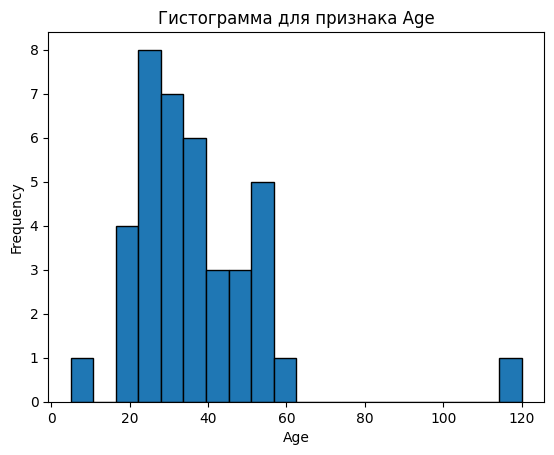

In [61]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Гистограмма для признака Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Сохранение графика в папку figures
output_dir = 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/age.png')

plt.show()

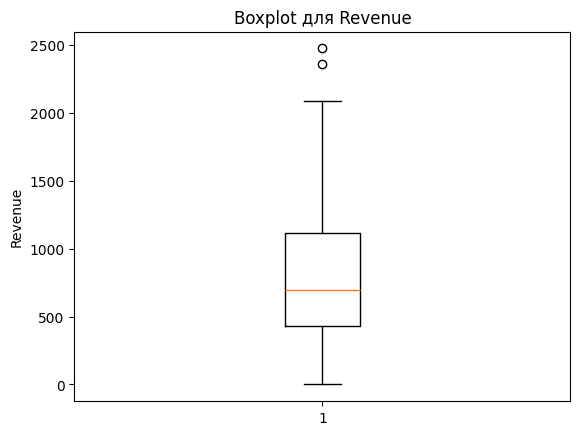

In [62]:
plt.boxplot(df['revenue'])
plt.title('Boxplot для Revenue')
plt.ylabel('Revenue')

# Сохранение графика в папку figures
output_dir = 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/boxplot_for_revenue.png')

plt.show()

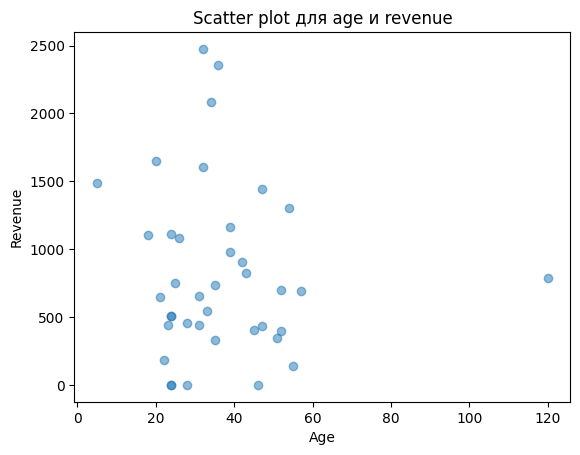

In [63]:
plt.scatter(df['age'], df['revenue'], alpha = 0.5)
plt.title('Scatter plot для age и revenue')
plt.xlabel('Age')
plt.ylabel('Revenue')

# Сохранение графика в папку figures
output_dir = 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(f'{output_dir}/scatterplot_for_age&revenue.png')

plt.show()

**1. Группировка по странам:**

При группировке данных по столбцу country и вычислении среднего значения для purchases и revenue, можно увидеть, что:
- Страна RU имеет наибольшее среднее значение покупок и доходов, что может указывать на более активное использование сервиса пользователями из этой страны.
- Страна FR показывает среднее значение дохода и количества покупок на уровне ниже, чем в других странах.

**2. Группировка по возрастным группам:**

После создания возрастных групп с помощью pd.cut() и агрегации purchases, было видно, что:
- Наибольшее количество покупок совершает группа 31-50 лет. Это может быть связано с тем, что люди в этом возрасте имеют более стабильные финансовые возможности.
- Возрастная группа 0-18 имеет наименьшее количество покупок, что логично, так как эта группа скорее всего ограничена в расходах.

**3. Гистограмма возраста:**

Гистограмма распределения возраста показала, что данные распределены нормально с небольшим смещением в сторону молодых людей. Это также подтверждается высокой активностью в возрастной группе 19-30.

**4. Boxplot доходов:**

Боксплот для столбца revenue показал наличие выбросов, которые, вероятно, являются ошибочными значениями или крайне высокими доходами. Это требует дополнительной проверки или исключения из анализа.

**5. Scatter plot для возраста и дохода:**

Диаграмма рассеяния показала, что между возрастом и доходом существует слабая корреляция. Наибольшие доходы связаны с возрастом в диапазоне 31-50 лет, что логично, так как люди в этой группе могут иметь более высокие доходы и стабильные карьерные позиции.

---

##### **Заключение:**
Данные содержат несколько проблем с качеством, включая пропуски, дубликаты и подозрительные значения. Эти проблемы должны быть обработаны, чтобы улучшить точность и надежность анализа. На основе EDA можно сделать вывод, что возраст и страна влияют на поведение пользователей в отношении покупок и доходов. Визуализация данных помогла выявить выбросы и особенности распределения, которые могут потребовать дополнительного внимания в процессе обработки данных.